<a href="https://colab.research.google.com/github/jaemoi/sturdy-happiness/blob/main/%EB%B2%84%EC%8A%A4%EC%BD%94%EB%93%9C%EC%98%88%EC%B8%A1_3%EB%93%B1%ED%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

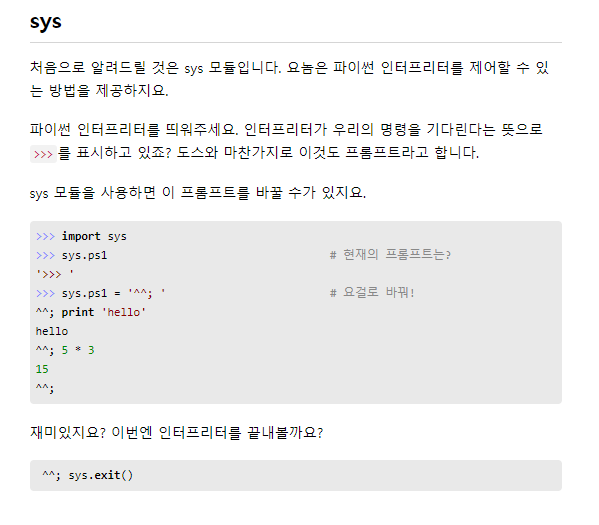

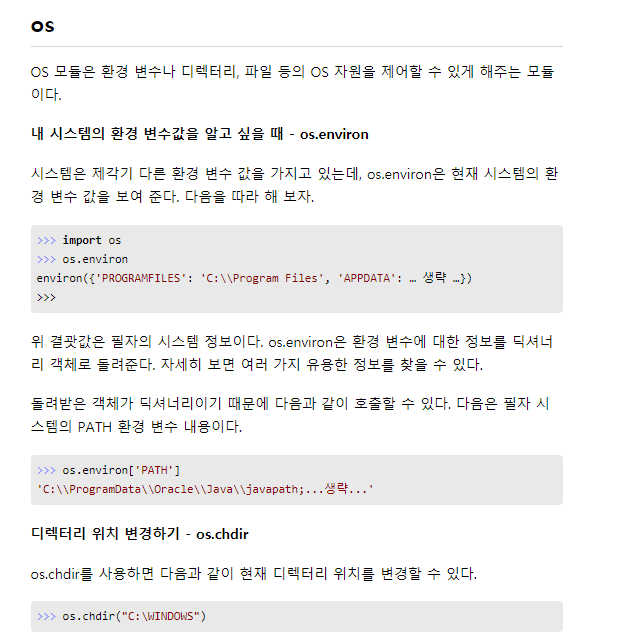

In [74]:
#Library 예시
import pandas as pd # 데이터 분석
import numpy as np # 행렬 연산, version: 1.6.1
import os
os.chdir(r'/content')
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#사용한 데이터 불러오기 예시
df_train = pd.read_csv('train.csv') # 대회 데이터
df_test = pd.read_csv('test.csv') # 대회 데이터

os.chdir 다음에 써있는 r 은 raw String으로 특수문자를 무시하는 것입니다. 가령 html에서 /n은 줄을 바꿔라 이런것인데 r을 써주면 무시하고 글자 그대로 다 반환해주는것입니다. 

In [75]:
pwd

'/content'

In [76]:
df_train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [77]:
df_train.shape

(210457, 14)

In [78]:
#일단 사용하지 않을 것들을 없애주었다.
df_train.drop(['route_id', 'vh_id', 'now_station', 'next_station'], axis=1, inplace=True)

In [79]:
df_train.head(5)

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,24
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,36
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,40
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,42
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,64


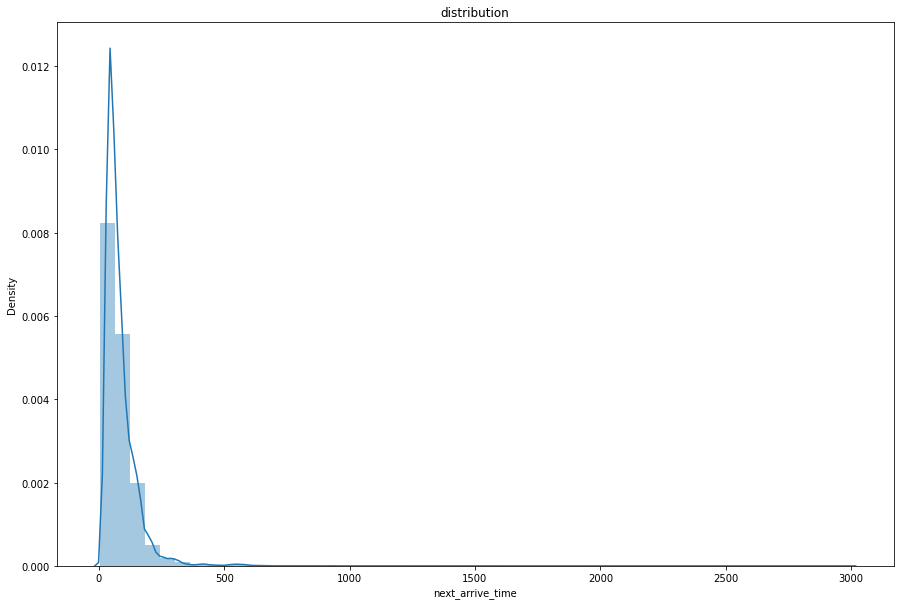

In [80]:
plt.figure(figsize=(15,10))
plt.title('distribution')
sns.distplot(df_train['next_arrive_time'])

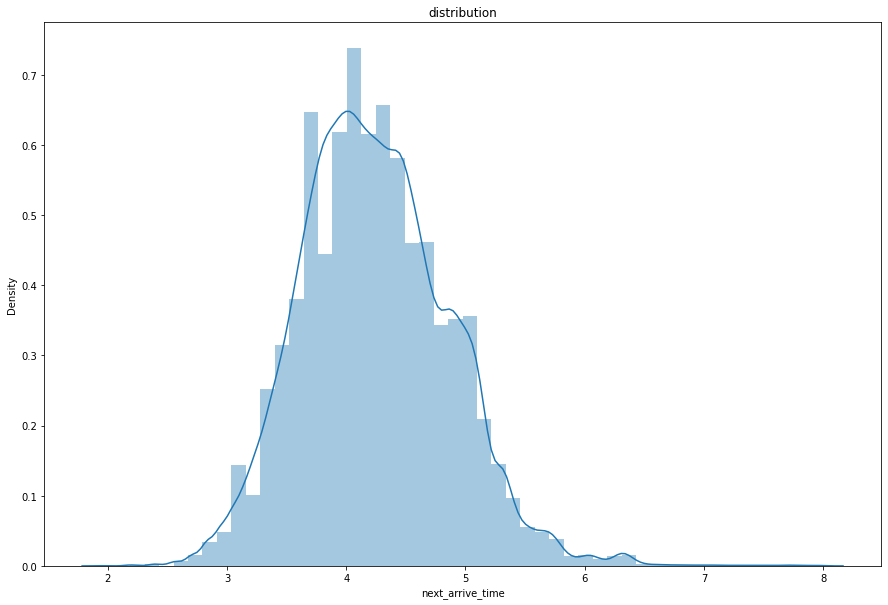

In [81]:
plt.figure(figsize=(15,10))
df_train['next_arrive_time'] = np.log1p(df_train['next_arrive_time'])
plt.title('distribution')
sns.distplot(df_train['next_arrive_time'])

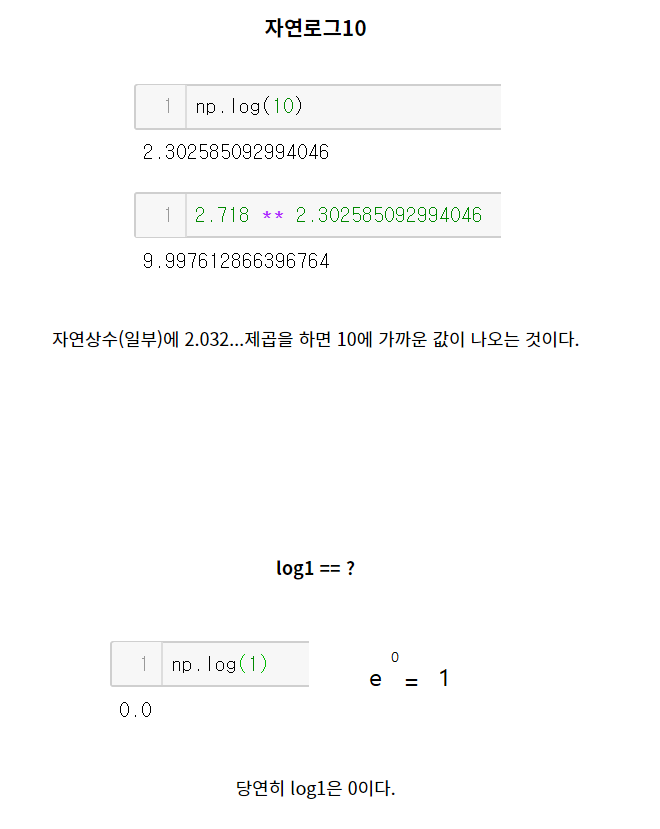

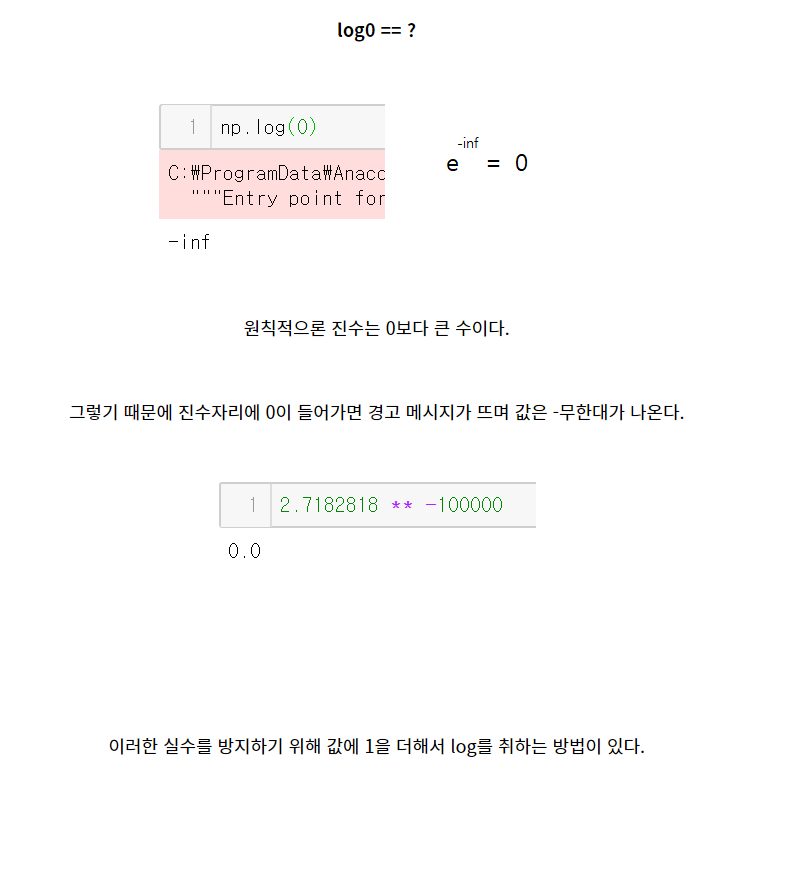

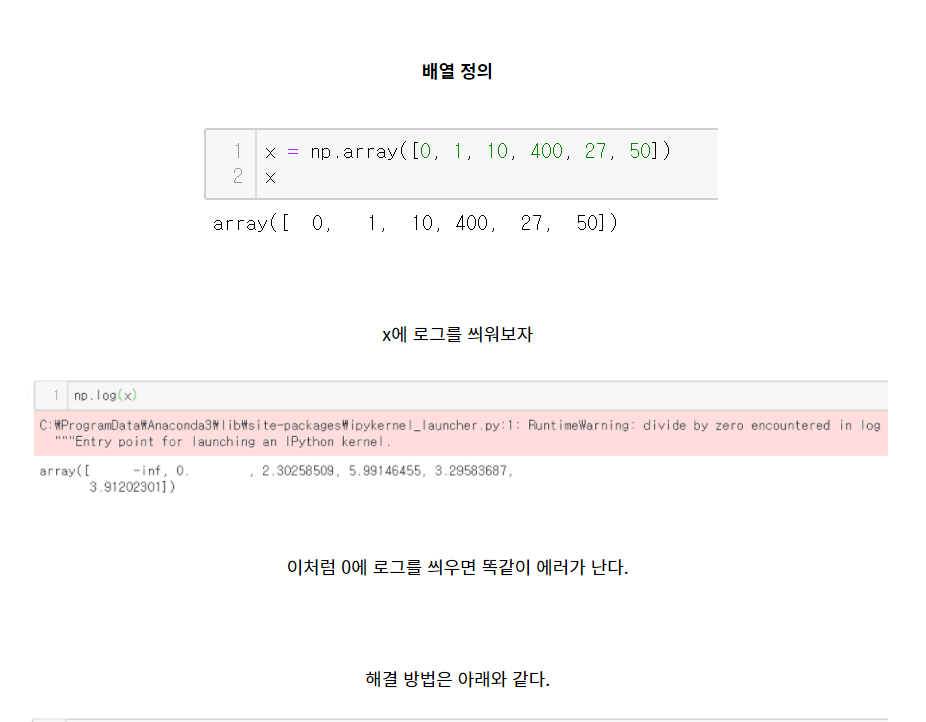

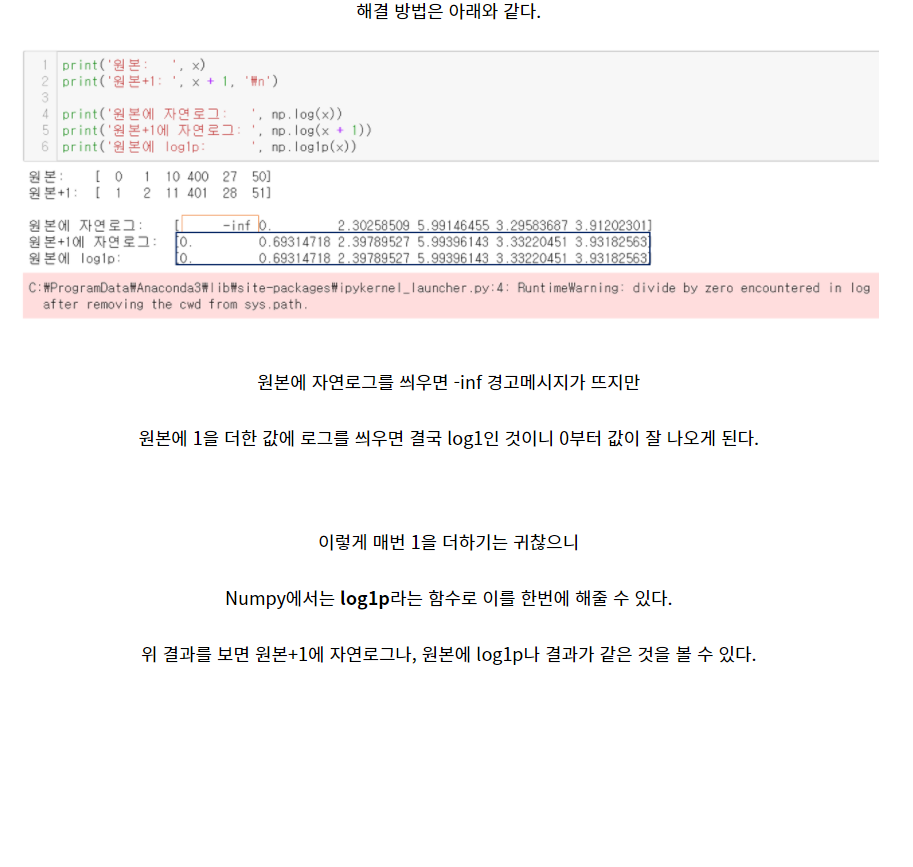

In [82]:
df_train['bus_group']='group'

In [83]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,group
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,group
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,group
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,group
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,group
...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,group
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,group
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,group
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,group


In [84]:
df_train['bus_group']='group'

df_train.loc[ (df_train['route_nm']=='360-1') | (df_train['route_nm']=='360-2') | (df_train['route_nm']=='360-7') | (df_train['route_nm']=='360-12'), ['bus_group'] ] = '360'
df_train.loc[ (df_train['route_nm']=='365-21') | (df_train['route_nm']=='365-22'), ['bus_group'] ] = '365'
df_train.loc[ (df_train['route_nm']=='201-11') | (df_train['route_nm']=='201-12') | (df_train['route_nm']=='201-13') | (df_train['route_nm']=='201-14') | (df_train['route_nm']=='201-16') | (df_train['route_nm']=='201-17') | (df_train['route_nm']=='201-18') | (df_train['route_nm']=='201-21') | (df_train['route_nm']=='201-22') | (df_train['route_nm']=='201-24') | (df_train['route_nm']=='201-26') | (df_train['route_nm']=='201-27'), ['bus_group'] ] = '201'
df_train.loc[ (df_train['route_nm']=='281-1') | (df_train['route_nm']=='281-2'), ['bus_group'] ] = '281'

In [85]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,360
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,360
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,360
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,360
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,360
...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,281
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,281
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,281
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,281


In [86]:
df_train['bus_group']='group'

df_train.loc[ (df_train['route_nm']=='360-1') | (df_train['route_nm']=='360-2') | (df_train['route_nm']=='360-7') | (df_train['route_nm']=='360-12'), ['bus_group'] ] = '360'
df_train.loc[ (df_train['route_nm']=='365-21') | (df_train['route_nm']=='365-22'), ['bus_group'] ] = '365'
df_train.loc[ (df_train['route_nm']=='201-11') | (df_train['route_nm']=='201-12') | (df_train['route_nm']=='201-13') | (df_train['route_nm']=='201-14') | (df_train['route_nm']=='201-16') | (df_train['route_nm']=='201-17') | (df_train['route_nm']=='201-18') | (df_train['route_nm']=='201-21') | (df_train['route_nm']=='201-22') | (df_train['route_nm']=='201-24') | (df_train['route_nm']=='201-26') | (df_train['route_nm']=='201-27'), ['bus_group'] ] = '201'
df_train.loc[ (df_train['route_nm']=='281-1') | (df_train['route_nm']=='281-2'), ['bus_group'] ] = '281'


df_train = pd.get_dummies(df_train,columns=['bus_group'])

In [87]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,bus_group_group
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,0


pd.get_dummies는 전처리 과정 중 하나도 칸에 가변수를 만들어주는 것이다. 예를 들어서 index.No에 월화수가 들어가 있을때 데이터를 단순히 수치로 월 1 화2 수3 이렇게만 변환하면 컴퓨터는 1+2 = 3이라는 관계성을 인식할수 도 있어서
월화수를 컬럼에 표시하고 해당하는 인덱스에 따라 값을 1 아니면 0으로 주게된다.

이를 적용해서
버스 번호도 전처리를 해주었다.

In [88]:
del df_train['bus_group_group']

In [89]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0


In [90]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [91]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0


In [92]:
df_train['date']

0        2019-10-15
1        2019-10-15
2        2019-10-15
3        2019-10-15
4        2019-10-15
            ...    
210452   2019-10-28
210453   2019-10-28
210454   2019-10-28
210455   2019-10-28
210456   2019-10-28
Name: date, Length: 210457, dtype: datetime64[ns]

In [93]:
df_train['date'].dt.weekday

0         1
1         1
2         1
3         1
4         1
         ..
210452    0
210453    0
210454    0
210455    0
210456    0
Name: date, Length: 210457, dtype: int64

해당 날짜가 월(0)~일(6) 중 어디에 해당하는지를 알려준다.

In [94]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0


In [95]:
df_train['weekday'] = df_train['date'].dt.weekday

In [96]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,1
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,1
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,1
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,1
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,0


In [97]:
df_train['weekday']

0         1
1         1
2         1
3         1
4         1
         ..
210452    0
210453    0
210454    0
210455    0
210456    0
Name: weekday, Length: 210457, dtype: int64

In [98]:
df_train = pd.get_dummies(df_train,columns=['weekday'])

In [99]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,0,1,0,0,0,0,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,0,1,0,0,0,0,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,0,1,0,0,0,0,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,0,1,0,0,0,0,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,1,0,0,0,0,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,1,0,0,0,0,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,1,0,0,0,0,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,1,0,0,0,0,0,0


In [100]:
df_train['time_group']='group' #time_group 변수를 미리 생성

df_train.loc[ (df_train['now_arrive_time']>='05시') & (df_train['now_arrive_time']<'07시') ,['time_group'] ]= 'morning_1' # 5~6시
df_train.loc[ (df_train['now_arrive_time']>='07시') & (df_train['now_arrive_time']<'09시') ,['time_group'] ]= 'morning_2' # 7~8시
df_train.loc[ (df_train['now_arrive_time']>='09시') & (df_train['now_arrive_time']<'11시') ,['time_group'] ]= 'afternoon_1' # 9~10시
df_train.loc[ (df_train['now_arrive_time']>='11시') & (df_train['now_arrive_time']<'13시') ,['time_group'] ]= 'afternoon_2' # 11~12시
df_train.loc[ (df_train['now_arrive_time']>='13시') & (df_train['now_arrive_time']<'15시') ,['time_group'] ]= 'afternoon_3' #13~14시
df_train.loc[ (df_train['now_arrive_time']>='15시') & (df_train['now_arrive_time']<'17시') ,['time_group'] ]= 'evening_1' #15~16시
df_train.loc[ (df_train['now_arrive_time']>='17시') & (df_train['now_arrive_time']<'19시') ,['time_group'] ]= 'evening_2' #17~18시
df_train.loc[ (df_train['now_arrive_time']>='19시') & (df_train['now_arrive_time']<'21시'),['time_group'] ]= 'evening_3' #19~20시
df_train.loc[ (df_train['now_arrive_time']>='21시') & (df_train['now_arrive_time']<'23시'),['time_group'] ]= 'night_1' #21~22시
df_train.loc[ (df_train['now_arrive_time']>='23시') | (df_train['now_arrive_time']=='00시'),['time_group'] ]= 'night_2' #23~00시

df_train = pd.get_dummies(df_train,columns=['time_group'])

In [101]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [102]:
# 해당 주요 장소의 임의 지역 위도, 경도
up=(33.506286, 126.490312) # 제주국제공항 근처
right=(33.493521, 126.895326) #성산일출봉 근처
down=(33.246742, 126.562387) #서귀포시 근처
center=(33.379724, 126.545315) #성산일출봉 근처

In [103]:
import geopy.distance #거리 계산해주는 패키지 사용

In [104]:
#for i,j in list( zip( df_train['now_latitude'],df_train['now_longitude'] ))
#geopy.distance.vincenty( (i,j), up).km  

In [105]:
t1 = [geopy.distance.vincenty( (i,j), up).km for i,j in list( zip( df_train['now_latitude'],df_train['now_longitude'] )) ]
t2 = [geopy.distance.vincenty( (i,j), down).km for i,j in list( zip( df_train['now_latitude'],df_train['now_longitude'] )) ]
t3 = [geopy.distance.vincenty( (i,j), right).km for i,j in list( zip( df_train['now_latitude'],df_train['now_longitude'] )) ]
t4 = [geopy.distance.vincenty( (i,j), center).km for i,j in list( zip( df_train['now_latitude'],df_train['now_longitude'] )) ]

In [106]:
total=pd.DataFrame( list(zip( t1,t2,t3,t4)),columns=['up','down','right','center'] )

total

,up,down,right,center
0,7.961411,23.259653,32.201351,8.510603
1,8.003995,23.413145,31.971932,8.688883
2,8.159840,23.522294,31.649300,8.839780
3,5.780072,25.895919,32.704599,11.089988
4,2.327262,27.232506,37.221102,12.649836
...,...,...,...,...
210452,28.942535,1.725047,39.626430,14.068226
210453,29.492957,0.607982,40.777686,14.703274
210454,28.957157,0.603189,41.111940,14.246498
210455,29.028770,0.549321,41.223468,14.328926


같은 줄의 수를 가진 컬럼이 있는 데이터 자료를 zip 함수를 통해서 붙이고 거기서 위,경도를 하나씩 뽑아서 위치를 찍는다. 이제 그걸 가지고 정류장의 위치가 up,down,right,center 로 표시한 곳과 얼마나 먼지를 거리를 잰다.

In [107]:
df_train['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

그런 다음 거리중 가장 가까운 최소의 거리가 몇번째 열인지를 출력한다.

In [108]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [109]:
df_train[df_train["dist_name"]==2]

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name
6473,6473,2019-10-15,201-11,33.555325,126.736182,09시,724.0,33.555350,126.743283,4.465908,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
6474,6474,2019-10-15,201-11,33.554900,126.751267,10시,313.0,33.555633,126.754533,4.110874,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
6475,6475,2019-10-15,201-11,33.551983,126.768550,10시,878.0,33.549250,126.777300,4.934474,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
6476,6476,2019-10-15,201-11,33.551750,126.791150,10시,751.0,33.551183,126.798983,4.615121,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
6477,6477,2019-10-15,201-11,33.538767,126.826933,10시,298.0,33.537100,126.829450,3.555348,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207335,207335,2019-10-28,201-27,33.529759,126.838786,19시,171.0,33.530783,126.837583,2.944439,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
207336,207336,2019-10-28,201-27,33.537100,126.829450,19시,298.0,33.538767,126.826933,3.496508,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
207337,207337,2019-10-28,201-27,33.555633,126.754533,19시,313.0,33.554900,126.751267,4.343805,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
207338,207338,2019-10-28,201-27,33.554900,126.751267,19시,322.0,33.554217,126.747950,4.595120,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2


In [110]:
df_train[df_train["dist_name"]==3]

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name
12692,12692,2019-10-15,281-1,33.452653,126.551249,07시,698.0,33.447858,126.555389,4.043051,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
12693,12693,2019-10-15,281-1,33.447858,126.555389,07시,364.0,33.445667,126.558167,4.595120,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
12694,12694,2019-10-15,281-1,33.438417,126.569363,07시,666.0,33.438483,126.576400,4.174387,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
12717,12717,2019-10-15,281-1,33.438483,126.576400,09시,666.0,33.438417,126.569363,4.043051,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
12718,12718,2019-10-15,281-1,33.445667,126.558167,09시,364.0,33.447858,126.555389,4.394449,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210430,210430,2019-10-28,281-2,33.438628,126.569447,18시,274.0,33.440282,126.567532,3.433987,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
210431,210431,2019-10-28,281-2,33.440282,126.567532,18시,1121.0,33.445713,126.558430,4.343805,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
210432,210432,2019-10-28,281-2,33.445713,126.558430,18시,374.0,33.447993,126.555583,4.043051,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
210433,210433,2019-10-28,281-2,33.447993,126.555583,18시,676.0,33.452636,126.551640,4.488636,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3


In [111]:
df_train = pd.get_dummies(df_train,columns=['dist_name'])

In [112]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name_0,dist_name_1,dist_name_2,dist_name_3
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


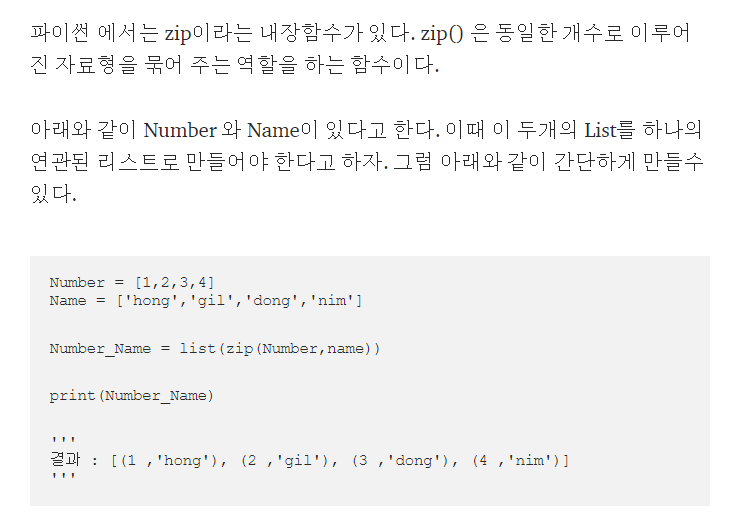

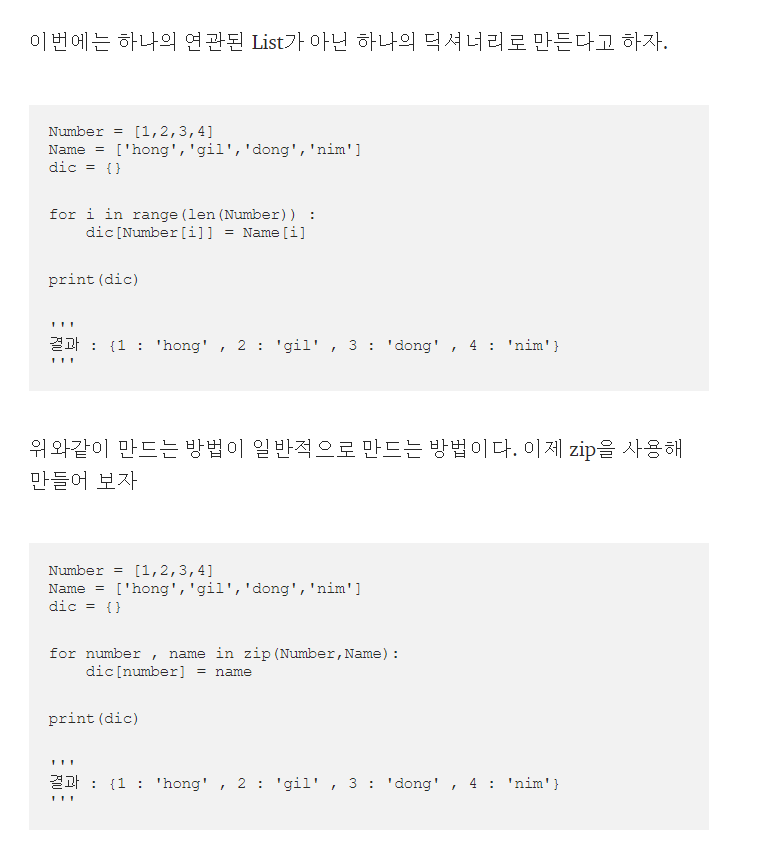

In [113]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name_0,dist_name_1,dist_name_2,dist_name_3
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [114]:
df_train['distance_line']=[ geopy.distance.vincenty( (i,j), (k,l) ).km 
 for i,j,k,l in list( zip( df_train['now_latitude'],df_train['now_longitude'],df_train['next_latitude'],df_train['next_longitude'] ) ) ]

현재 정류장과 다음정류장의 위경도를 뽑아서 거리를 구한다.

In [115]:
df_train

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time,bus_group_201,bus_group_281,bus_group_360,bus_group_365,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name_0,dist_name_1,dist_name_2,dist_name_3,distance_line
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,3.218876,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.265361
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,3.610918,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.331896
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,3.713572,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.415706
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,3.761200,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.577617
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,4.174387,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.374588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,281-2,33.255783,126.577450,21시,528.0,33.251896,126.574417,4.574711,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.515489
210453,210453,2019-10-28,281-2,33.248595,126.568527,21시,280.0,33.249753,126.565959,3.931826,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.271597
210454,210454,2019-10-28,281-2,33.251891,126.560303,21시,114.0,33.251084,126.559551,2.833213,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.113673
210455,210455,2019-10-28,281-2,33.251084,126.559551,21시,223.0,33.249504,126.558068,3.663562,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.223174


In [116]:
df_test

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,405328102,7983486,281-2,33.493625,126.534764,제주지방법원(광양방면),20시,272.0,고산동산(광양방면),33.495540,126.532907
91770,302351,2019-11-05,405328102,7983486,281-2,33.495540,126.532907,고산동산(광양방면),20시,447.0,제주시청(광양방면),33.498925,126.530351
91771,302352,2019-11-05,405328102,7983486,281-2,33.498925,126.530351,제주시청(광양방면),20시,418.0,광양사거리,33.500473,126.527103
91772,302353,2019-11-05,405328102,7983486,281-2,33.500473,126.527103,광양사거리,20시,140.0,탐라장애인 종합복지관,33.500228,126.525625


In [117]:
df_test.drop(['route_id', 'vh_id', 'now_station', 'next_station'], axis=1 , inplace=True)

drop으로 칸을 지우려고 한다 그럴 때 axis-1을 써주면 칸만 지울수 있다. axis=0을 쓰거나 안쓰면 줄만 지울수 있다.

In [118]:
df_test['bus_group']='group'

df_test.loc[ (df_test['route_nm']=='360-1') | (df_test['route_nm']=='360-2') | (df_test['route_nm']=='360-7') | (df_test['route_nm']=='360-12'), ['bus_group'] ] = '360'
df_test.loc[ (df_test['route_nm']=='365-21') | (df_test['route_nm']=='365-22'), ['bus_group'] ] = '365'
df_test.loc[ (df_test['route_nm']=='201-11') | (df_test['route_nm']=='201-12') | (df_test['route_nm']=='201-13') | (df_test['route_nm']=='201-14') | (df_test['route_nm']=='201-16') | (df_test['route_nm']=='201-17') | (df_test['route_nm']=='201-18') | (df_test['route_nm']=='201-21') | (df_test['route_nm']=='201-22') | (df_test['route_nm']=='201-24') | (df_test['route_nm']=='201-26') | (df_test['route_nm']=='201-27'), ['bus_group'] ] = '201'
df_test.loc[ (df_test['route_nm']=='281-1') | (df_test['route_nm']=='281-2'), ['bus_group'] ] = '281'

df_test = pd.get_dummies(df_test,columns=['bus_group'])

In [119]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['weekday'] = df_test['date'].dt.weekday
df_test = pd.get_dummies(df_test,columns=['weekday'])

In [120]:
df_test['time_group']='group' #time_group 변수를 미리 생성

df_test.loc[ (df_test['now_arrive_time']>='05시') & (df_test['now_arrive_time']<'07시') ,['time_group'] ]= 'morning_1' # 5~6시
df_test.loc[ (df_test['now_arrive_time']>='07시') & (df_test['now_arrive_time']<'09시') ,['time_group'] ]= 'morning_2' # 7~8시
df_test.loc[ (df_test['now_arrive_time']>='09시') & (df_test['now_arrive_time']<'11시') ,['time_group'] ]= 'afternoon_1' # 9~10시
df_test.loc[ (df_test['now_arrive_time']>='11시') & (df_test['now_arrive_time']<'13시') ,['time_group'] ]= 'afternoon_2' # 11~12시
df_test.loc[ (df_test['now_arrive_time']>='13시') & (df_test['now_arrive_time']<'15시') ,['time_group'] ]= 'afternoon_3' #13~14시
df_test.loc[ (df_test['now_arrive_time']>='15시') & (df_test['now_arrive_time']<'17시') ,['time_group'] ]= 'evening_1' #15~16시
df_test.loc[ (df_test['now_arrive_time']>='17시') & (df_test['now_arrive_time']<'19시') ,['time_group'] ]= 'evening_2' #17~18시
df_test.loc[ (df_test['now_arrive_time']>='19시') & (df_test['now_arrive_time']<'21시'),['time_group'] ]= 'evening_3' #19~20시
df_test.loc[ (df_test['now_arrive_time']>='21시') & (df_test['now_arrive_time']<'23시'),['time_group'] ]= 'night_1' #21~22시
df_test.loc[ (df_test['now_arrive_time']>='23시') | (df_test['now_arrive_time']=='00시'),['time_group'] ]= 'night_2' #23~00시

df_test = pd.get_dummies(df_test,columns=['time_group'])

In [121]:
df_test['distance_line']=[ geopy.distance.vincenty( (i,j), (k,l) ).km 
 for i,j,k,l in list( zip( df_test['now_latitude'],df_test['now_longitude'],df_test['next_latitude'],df_test['next_longitude'] ) ) ]

In [122]:
t1 = [geopy.distance.vincenty( (i,j), up).km for i,j in list( zip( df_test['now_latitude'],df_test['now_longitude'] )) ]
t2 = [geopy.distance.vincenty( (i,j), down).km for i,j in list( zip( df_test['now_latitude'],df_test['now_longitude'] )) ]
t3 = [geopy.distance.vincenty( (i,j), right).km for i,j in list( zip( df_test['now_latitude'],df_test['now_longitude'] )) ]
t4 = [geopy.distance.vincenty( (i,j), center).km for i,j in list( zip( df_test['now_latitude'],df_test['now_longitude'] )) ]

total=pd.DataFrame( list(zip( t1,t2,t3,t4)),columns=['up','down','right','center'] )
df_test['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)
df_test = pd.get_dummies(df_test,columns=['dist_name'])

In [123]:
df_test

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,bus_group_201,bus_group_281,bus_group_360,bus_group_365,bus_group_group,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,time_group_afternoon_1,time_group_afternoon_2,time_group_afternoon_3,time_group_evening_1,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,distance_line,dist_name_0,dist_name_1,dist_name_2,dist_name_3
0,210457,2019-10-29,360-1,33.457724,126.554014,07시,333.0,33.458783,126.557353,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.331896,1,0,0,0
1,210458,2019-10-29,360-1,33.458783,126.557353,07시,415.0,33.459893,126.561624,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.415706,1,0,0,0
2,210459,2019-10-29,360-1,33.478867,126.483833,08시,417.0,33.478850,126.488350,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.419837,1,0,0,0
3,210460,2019-10-29,360-1,33.478850,126.488350,08시,334.0,33.480700,126.489933,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.252488,1,0,0,0
4,210461,2019-10-29,360-1,33.480700,126.489933,08시,550.0,33.482077,126.485355,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.452070,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91769,302350,2019-11-05,281-2,33.493625,126.534764,20시,272.0,33.495540,126.532907,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.273666,1,0,0,0
91770,302351,2019-11-05,281-2,33.495540,126.532907,20시,447.0,33.498925,126.530351,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.444265,1,0,0,0
91771,302352,2019-11-05,281-2,33.498925,126.530351,20시,418.0,33.500473,126.527103,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.347232,1,0,0,0
91772,302353,2019-11-05,281-2,33.500473,126.527103,20시,140.0,33.500228,126.525625,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.140001,1,0,0,0


In [124]:
input_var = list(df_train.columns[10:]) + ['distance']

X_features = df_train[input_var]
y_target = df_train['next_arrive_time']

input_var

['bus_group_201',
 'bus_group_281',
 'bus_group_360',
 'bus_group_365',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'time_group_afternoon_1',
 'time_group_afternoon_2',
 'time_group_afternoon_3',
 'time_group_evening_1',
 'time_group_evening_2',
 'time_group_evening_3',
 'time_group_morning_1',
 'time_group_morning_2',
 'time_group_night_1',
 'time_group_night_2',
 'dist_name_0',
 'dist_name_1',
 'dist_name_2',
 'dist_name_3',
 'distance_line',
 'distance']

독립변수와 종속변수를 설정해 줍니다...


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [126]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('최적 평균 RMSE 값:', np.round(rmse, 4))
    print('최적 파라미터:', grid_model.best_params_)
    
    return grid_model.best_estimator_

In [129]:
import xgboost as xgb

# xgb_params 값을 바꾸어주며 learning_rate, max_depth 등 파라미터 성능 비교 시도했었음.
xgb_params = {'n_estimators':[100]}

xgb_reg = xgb.XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=100,
                           random_state =7, nthread = -1, n_jobs=-1)

best_xgb = get_best_params(xgb_reg, xgb_params)

최적 평균 RMSE 값: 0.3751
최적 파라미터: {'n_estimators': 100}


In [131]:
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)

In [132]:
from lightgbm import LGBMRegressor

# lgbm_params 값을 바꾸어주며 learning_rate, max_depth 등 파라미터 성능 비교 시도했었음.
lgbm_params = {'n_estimators':[100]}

lgbm_reg = LGBMRegressor(n_estimators=100, bagging_fraction=0.7, learning_rate=0.1,
                         max_depth=4, subsample=0.7, feature_fraction=0.9, boosting_type='gbdt',
                         colsample_bytree=0.5, reg_lambda=5, n_jobs=-1)

best_lgbm = get_best_params(lgbm_reg, lgbm_params)

최적 평균 RMSE 값: 0.3895
최적 파라미터: {'n_estimators': 100}


In [133]:
best_lgbm

LGBMRegressor(bagging_fraction=0.7, boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.5, feature_fraction=0.9,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=5, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

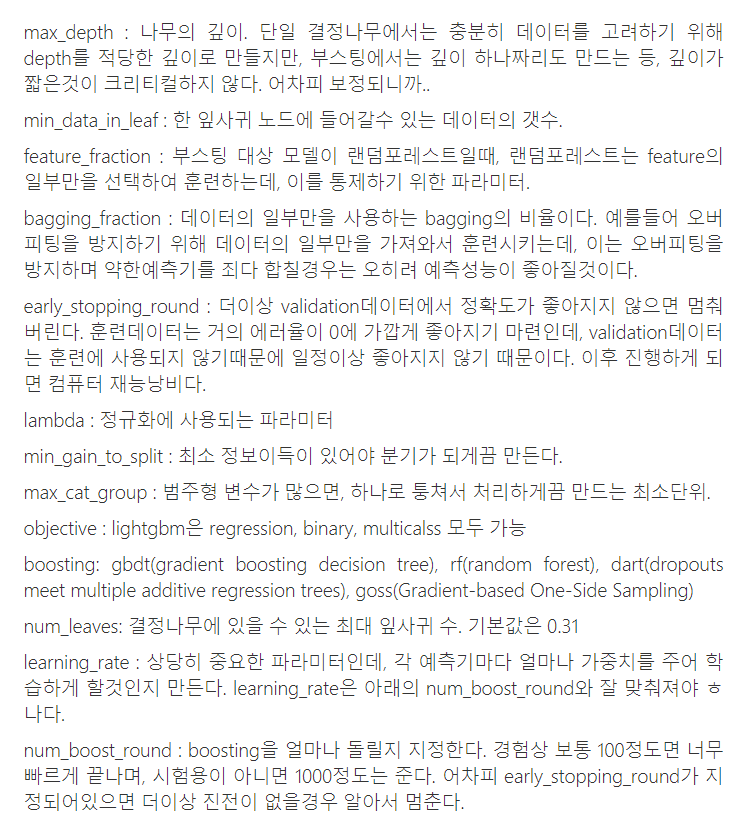

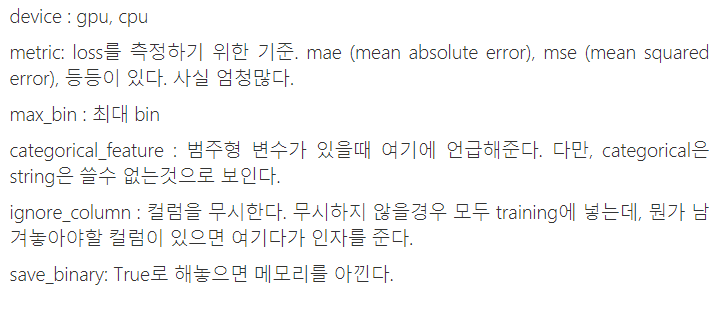

In [134]:
X_train = df_train[input_var]
X_test = df_test[input_var]

y_train = df_train['next_arrive_time']

In [135]:
best_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)

In [137]:
import xgboost as xgb

# 위의 베스트 파라미터 사용
xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)

In [138]:
xgb_reg.fit(X_train, y_train)

xgb_pred = np.expm1(xgb_reg.predict(X_test)) 

In [139]:
best_lgbm

LGBMRegressor(bagging_fraction=0.7, boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.5, feature_fraction=0.9,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=5, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [140]:
from lightgbm import LGBMRegressor

# 위의 베스트 파라미터 사용
lgbm_reg = LGBMRegressor(bagging_fraction=0.7, boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.5, feature_fraction=0.9,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3300, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=5, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [141]:
lgbm_reg.fit(X_train, y_train)

lgbm_pred = np.expm1(lgbm_reg.predict(X_test.values))

In [142]:
ensemble = xgb_pred*0.3 + lgbm_pred*0.7 # 테스트 결과 이 비율이 성능이 높았음.

In [143]:
# 적용
df_test['next_arrive_time'] = ensemble

In [144]:
# 적용된 값 확인
df_test[['id','next_arrive_time']].head(5)

,id,next_arrive_time
0,210457,40.699159
1,210458,51.074175
2,210459,119.758155
3,210460,57.913111
4,210461,143.126234


In [145]:
# submission.csv 파일로 저장
df_test[['id','next_arrive_time']].to_csv("submission.csv", index=False)